**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Carlos Humberto Galvan Perales
*   MATRÍCULA: A1797969

En esta actividad trabajarás con el archivo `personal_loan.csv`, basado en un conjunto de datos sobre clientes bancarios y su comportamiento financiero disponible en Kaggle.

Los datos fueron recopilados para analizar la posibilidad de que los clientes acepten un préstamo personal y contienen información demográfica, financiera y de productos bancarios asociados. Los indicadores incluidos son:

* `ID`: Identificador único del cliente
* `Age`: Edad del cliente (años completos)
* `Experience`: Experiencia laboral en años
* `Income`: Ingreso anual del cliente (en miles de dólares. Por ejemplo, 60 = 60,000 USD/año)
* `ZIP Code`: Código postal del cliente
* `Family`: Número de miembros de la familia
* `CCAvg`: Promedio de gastos mensuales con tarjeta de crédito (en miles de dólares)
* `Education`: Nivel educativo (1 = graduado, 2 = universitario, 3 = posgrado)
* `Mortgage`: Monto de hipoteca que posee el cliente (en miles de dólares)
* `Securities Account`: Indicador de si tiene cuenta de valores (1 = sí, 0 = no)
* `CD Account`: Indicador de si tiene cuenta de certificado de depósito (1 = sí, 0 = no)
* `Online`: Indicador de si usa los servicios bancarios en línea (1 = sí, 0 = no)
* `CreditCard`: Indicador de si es titular de tarjeta de crédito (1 = sí, 0 = no)
* `Personal Loan`: Si el cliente aceptó (1) o no (0) un préstamo personal. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## 1. Descarga el archivo: `personal_loan.csv` y guarda, en un dataframe (`loan_df`), todos sus registros.
* Haz que la columna `ID` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?

In [ ]:
# Cargar csv con argumento de index_col
loan_df = pd.read_csv("personal_loan.csv", index_col = "ID")
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 5036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5037 non-null   int64  
 1   Experience          5037 non-null   int64  
 2   Income              5037 non-null   int64  
 3   ZIP Code            5037 non-null   int64  
 4   Family              5037 non-null   int64  
 5   CCAvg               5037 non-null   float64
 6   Education           5037 non-null   float64
 7   Mortgage            5037 non-null   int64  
 8   Personal Loan       5037 non-null   object 
 9   Securities Account  5037 non-null   object 
 10  CD Account          5037 non-null   object 
 11  Online              5037 non-null   object 
 12  CreditCard          5037 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 550.9+ KB


In [3]:
loan_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
0,25,1,49,91108,4,1.6,1.0,0,0,Yes,No,0,0
1,45,19,34,90089,3,1.5,1.0,0,No,Yes,No,No,0
2,39,15,11,94720,1,1.0,1.0,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2.0,0,0,0,0,No,0
4,35,8,45,91330,4,1.0,2.0,0,0,No,No,0,1


El DataFrame se compone de:

| Columna             | Numerica (Cuantitativa)|| Categorica|            | Tipo de dato en tabla||
|---------------------|----------|--------------|-----------|------------|----------|------------|
|                     | **Discreta** | **Continua**     |**dicotómica** | **politómica** | **Numerico** | **Texto**      |
| `Age`                 | X        |              |           |            |  X       |            |
| `Experience`          | X        |              |           |            |  X       |            |
| `Income`              |          | X            |           |            |  X       |            |
| `ZIP Code`            | X        |              |           |            |  X       |            |
| `Family`              | X        |              |           |            |  X       |            |
| `CCAvg`               |          | X            |           |            |  X       |            |
| `Education`           | X        |              |           |            |  X       |            |
| `Mortgage`            |          | X            |           |            |  X       |            |
| `Personal Loan`       |          |              |    X      |            |          |   X        |
| `Securities Account`  |          |              |    X      |            |          |   X        |
| `CD Account`          |          |              |    X      |            |          |   X        |
| `Online`              |          |              |    X      |            |          |   X        |
| `CreditCard`          |          |              |    X      |            |          |   X        |


# Limpieza

## 2. Obtén las estadísticas descriptivas de las variables numéricas y examina cuidadosamente los valores obtenidos de cada columna.
* Filtra el dataframe para visualizar los registros en que la edad supera los 100 años y elimínalos si no son pausibles.
* Analiza el resto de las variables y elimina aquellos registros que contengan valores inválidos o inconsistentes. Para cada acción que realices, justifica la decisión, explicando por qué consideras que el valor es incorrecto.
* ¿Cuántos registros se eliminaron (considerando todas las acciones de este ejercicio) y qué porcentaje representa respecto al total del dataframe inicial?

De la descripcion obtenida en el punto anterior, podemos convertir la columna Zip Code para no ser considerada como una variable numerica

In [4]:
# Almacena el número de registros antes del proceso de limpieza de datos
num_registros_inicial = len(loan_df)


In [ ]:
# Convertir ZIP Code a object por la naturaleza del dato
loan_df['ZIP Code'] = loan_df['ZIP Code'].astype(str)

Aprovechemos la oportunidad para convertir las columnas dicotomicas en valores booleanos

In [6]:
dicotomicas = ["Personal Loan","Securities Account","CD Account","Online","CreditCard"]

for column in dicotomicas:
    print(f"{column} unique values: {loan_df[column].unique()}")


Personal Loan unique values: ['0' 'No' 'Yes' '1']
Securities Account unique values: ['Yes' '0' 'No' '1']
CD Account unique values: ['No' '0' '1' 'Yes']
Online unique values: ['0' 'No' '1' 'Yes']
CreditCard unique values: ['0' '1' 'Yes' 'No']


In [7]:
for column in dicotomicas:
    loan_df[column] = loan_df[column].map({'1': True, 'Yes': True, '0': False, 'No': False})

In [8]:
loan_df.describe(include = np.number)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage
count,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000
mean,45.411356,20.122494,73.898352,2.394679,1.942404,1.880941,56.500695
std,11.646805,11.461278,46.130504,1.151145,1.755954,0.843337,101.657580
min,23.000000,-3.000000,8.000000,-3.000000,0.000000,1.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000
max,144.000000,43.000000,224.000000,4.000000,10.000000,7.300000,635.000000


A partir de las estadisticas descriptivas podemos destacar algunos hallazgos:

**Age**
- Como es indicado en los puntos del ejercicio, podemos ver registros cuya edad sobrepasa los 100 años, una posible instancia de valores erróneos

**Experience**
- Contiene valores negativos, valores que necesitamos remover

**Family**
- Contiene valores negativos

In [9]:
age_plus100 = loan_df.query("Age > 100")
age_plus100

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
10,123,39,105,94710,4,2.4,3.0,0,False,False,False,False,False
250,144,6,29,94305,3,1.0,2.0,117,False,False,False,False,False
4800,130,7,73,94028,1,2.5,1.0,135,False,False,False,False,False


Sabemos que la persona mas longeva aun viva en este momento tiene 116 años, sin embargo tratemos de apegarnos a métodos más generalizados debido a que este es un caso teórico y no conocemos el origen de los datos.

Sabemos que una de los fórmulas mas generalizadas para la identificación de outliers es definir limiter inferiores y superiores con los rangos intercuartiles.

$$Limite  inferior = Q1 - 1.5 * IQR$$

$$Limite  superior = Q3 + 1.5 * IQR$$

Dado que no es necesario definir un limite inferior, por la naturaleza de los datos, utilizaremos solo el limite superior.

In [10]:
# Método 1: Limite superior usando el rango intercuartil (IQR)
LimSup_Age = loan_df.Age.quantile(0.75) + 1.5 * (loan_df.Age.quantile(0.75) - loan_df.Age.quantile(0.25))
print("Limite superior (IQR):", LimSup_Age)

Limite superior (IQR): 85.0


Un limite superior de 85 parece un poco bajo por la naturaleza del dato, por lo tal intentaremos definir nuestro limite superior bajo otra metrica comunmente utilizada

In [11]:
# Método 2: Limite superior usando el Z-score
from scipy.stats import zscore

age_zscores = zscore(loan_df['Age'])
# Un umbral común para outliers es |z| > 3
outlier_threshold = 3
LimSup_Age_z = loan_df.loc[age_zscores > outlier_threshold, 'Age'].min() if any(age_zscores > outlier_threshold) else None
print("Primer valor de Age considerado outlier por Z-score (>3):", LimSup_Age_z)

Primer valor de Age considerado outlier por Z-score (>3): 123


Este valor parece mucho mas factible como primer outlier, por lo cual, eliminaremos todos los valores cuya Z score sobrepase 3

In [12]:
# Eliminar filas donde el Z-score de Age sea mayor a 3 (outliers)
loan_df = loan_df[age_zscores <= outlier_threshold]

In [ ]:
# Identificar columnas numéricas
numeric_cols = loan_df.select_dtypes(include=['number']).columns

# Buscar filas con valores negativos en cualquier columna numérica
neg_mask = (loan_df[numeric_cols] < 0).any(axis=1)
print(f"Número de filas con valores negativos: {neg_mask.sum()}")

# Eliminar filas con valores negativos en columnas numéricas
loan_df = loan_df[~neg_mask]

Número de filas con valores negativos: 55


Despues verificamos la informacion en la columna de ZIP Code. Sabemos que los codigos postales deben tener 5 digitos, por lo cual verificaremos cualquier fila que contenga un numero distinto de digitos.

In [14]:
# Filtrar filas con ZIP Code de menos de 5 dígitos
zip_lengths = loan_df['ZIP Code'].astype(str).str.len()
print(f"\nZIP code length distribution (before filtering):")
print(zip_lengths.value_counts().sort_index())

# Mantener solo filas donde ZIP Code tiene exactamente 5 dígitos
loan_df = loan_df[zip_lengths == 5]

# Mostrar la distribución después del filtrado
zip_lengths_after = loan_df['ZIP Code'].astype(str).str.len()
print(f"\nZIP code length distribution (after filtering):")
print(zip_lengths_after.value_counts().sort_index())


ZIP code length distribution (before filtering):
ZIP Code
4       1
5    4978
Name: count, dtype: int64

ZIP code length distribution (after filtering):
ZIP Code
5    4978
Name: count, dtype: int64


In [15]:
# Eliminar valores inválidos en la columna Education (deben ser solo 1, 2, 3)
valid_education = [1, 2, 3]
invalid_education_mask = ~loan_df['Education'].isin(valid_education)
print(f"Invalid education codes: {invalid_education_mask.sum()}")
if invalid_education_mask.sum() > 0:
    print("Eliminando los siguientes valores inválidos de Education:")
    print(loan_df[invalid_education_mask]['Education'].value_counts())
    loan_df = loan_df[loan_df['Education'].isin(valid_education)]

Invalid education codes: 1
Eliminando los siguientes valores inválidos de Education:
Education
7.3    1
Name: count, dtype: int64


In [ ]:
# Verificar existencia de valores negativos
negative_education = loan_df[loan_df['Education'] < 0]
print(f"Negative education values: {len(negative_education)}")

Negative education values: 0


In [17]:
# Verificar valores NaN en loan_df
nan_counts = loan_df.isna().sum()
print("Valores NaN por columna:")
print(nan_counts)
print(f"Total de filas con al menos un NaN: {loan_df.isna().any(axis=1).sum()}")


Valores NaN por columna:
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
Total de filas con al menos un NaN: 0


In [18]:
# Verificar si hay filas duplicadas (en toda la fila)
duplicate_rows = loan_df.duplicated()
print(f"Número de filas duplicadas (por contenido de fila): {duplicate_rows.sum()}")

# Verificar si hay índices duplicados
duplicate_indices = loan_df.index.duplicated()
print(f"Número de índices duplicados: {duplicate_indices.sum()}")


Número de filas duplicadas (por contenido de fila): 36
Número de índices duplicados: 0


Encontramos 36 duplicados en nuestro Dataset, sin embargo, dado que no conocemos el origen de la informacion y un "set" de informacion o muestra, aunque complicado no es imposible que tenga exactamente las mismas condiciones, partiremos del supuesto de que el ID unico no duplicado justifica el tomarlo con un datapoint mas.

In [ ]:
# Comparar el numero de registros despues de la limpieza de datos
num_registros_final = len(loan_df)
num_registros_eliminados = num_registros_inicial - num_registros_final
porcentaje_eliminados = (num_registros_eliminados / num_registros_inicial) * 100

print(f"Número de registros iniciales: {num_registros_inicial}")
print(f"Número de registros después de la limpieza: {num_registros_final}")
print(f"Número de registros eliminados tras la limpieza: {num_registros_eliminados}")
print(f"Porcentaje de registros eliminados: {porcentaje_eliminados:.2f}%")


Número de registros iniciales: 5037
Número de registros después de la limpieza: 4977
Número de registros eliminados tras la limpieza: 60
Porcentaje de registros eliminados: 1.19%


3. Obtén las estadísticas descriptivas de las variables de texto e imprime las frecuencias de sus categorías.
* Algunas columnas almacenan valores binarios utilizando distintos formatos. Unifica estos valores de manera consistente, asegurándote de que coincidan con la descripción de las variables al inicio de esta libreta.

In [20]:
loan_df.describe(include="bool")

,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4977,4977,4977,4977,4977
unique,2,2,2,2,2
top,False,False,False,True,False
freq,4492,4458,4674,2975,3513


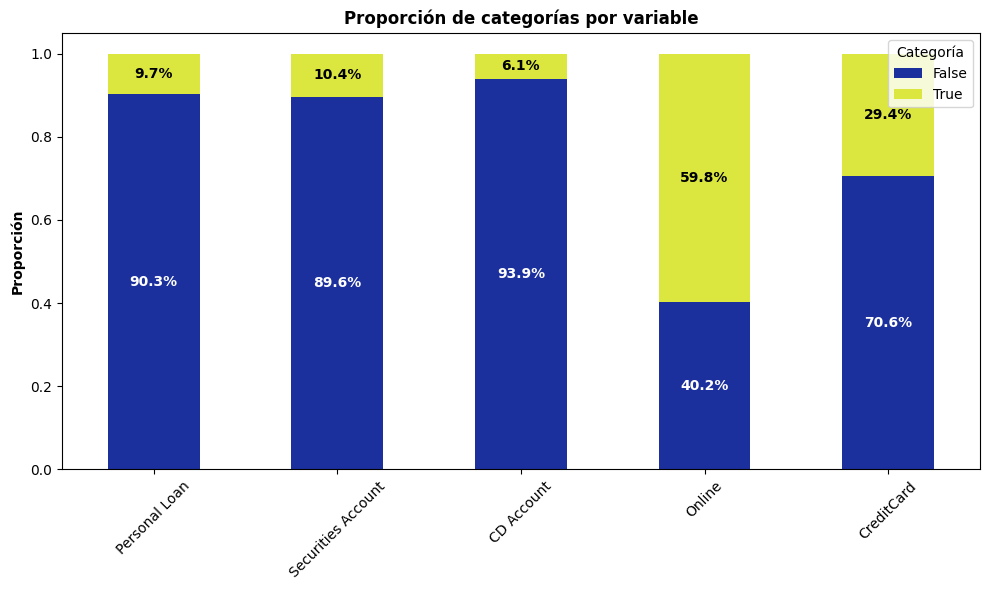

In [ ]:
text_variables = ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]

# Valores normalizados para cada variable
freqs = {}
all_categories = set()
for col in text_variables:
    vc = loan_df[col].value_counts(normalize=True)
    freqs[col] = vc
    all_categories.update(vc.index.tolist())

all_categories = sorted(list(all_categories))

# Dataframe para graficas
plot_df = pd.DataFrame(index=text_variables, columns=all_categories)
for col in text_variables:
    for cat in all_categories:
        plot_df.loc[col, cat] = freqs[col].get(cat, 0)

plot_df = plot_df.astype(float)

# Definir colores personalizados para las categorias
base_colors = ['#1c309d', '#dbe73f']
if len(all_categories) == 2:
    color_list = base_colors
else:
    color_list = [base_colors[i % 2] for i in range(len(all_categories))]

ax = plot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=color_list
)
ax.set_ylabel("Proporción", fontweight='bold')
ax.set_title("Proporción de categorías por variable", fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Categoría")
plt.tight_layout()

# Etiquetas de porcentage dentro de las barras
for i, var in enumerate(plot_df.index):
    bottom = 0
    for j, cat in enumerate(all_categories):
        value = plot_df.loc[var, cat]
        if value > 0:
            text_color = 'black' if cat is True else 'white'
            ax.text(
                i, 
                bottom + value/2, 
                f"{value*100:.1f}%", 
                ha='center', 
                va='center', 
                color=text_color, 
                fontsize=10, 
                fontweight='bold'
            )
        bottom += value

plt.show()


4. Verifica si hay registros duplicados y si fuera así, elimínalos del dataframe.
* Asegúrate de reiniciar el índice para mantener una secuencia continua tras todas las eliminaciones de registros que hasta este punto se han realizado.

Usamos el mismo analisis que hicimos algunos pasos arriba pero esta vez eliminando los duplicados

In [22]:
# Eliminar filas duplicadas (por contenido de fila)
loan_df = loan_df[~loan_df.duplicated(keep='first')]

# Eliminar índices duplicados
loan_df = loan_df[~loan_df.index.duplicated(keep='first')]

# Reiniciar el índice para mantener una secuencia continua
loan_df = loan_df.reset_index(drop=True)

5. Aunque hasta ahora se han considerado los tipos de datos inferidos por pandas, antes del EDA es recomendable revisar la naturaleza estadística de cada variable (continua, discreta, categórica, binaria, etc.) para aplicar el análisis adecuado.

* Efectúa las siguientes conversiones:
  - Nominal: ZIP Code - `object`
  - Ordinal: Education - `category` con orden 1, 2, 3
  - Binarias: Personal Loan, Securities Account, CD Account, Online, CreditCard - `category`
* Crea dos listas llamadas `num_cols` y `cat_cols` que contengan los nombres de las variables numéricas (int64, float64) y categóricas (object, category) del dataset, respectivamente.

In [23]:
loan_df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# Convertir 'ZIP Code' a object
loan_df['ZIP Code'] = loan_df['ZIP Code'].astype(str)

# Convertir educacion a categorica ordenada
from pandas.api.types import CategoricalDtype
loan_df['Education'] = loan_df['Education'].astype(CategoricalDtype(categories=[1, 2, 3], ordered=True))

# Convertir columnas binarias a categoricas
binary_cols = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in binary_cols:
    loan_df[col] = loan_df[col].astype('category')


In [25]:
# Crear listas de columnas numéricas y categóricas según el tipo de dato
num_cols = loan_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")


Numerical columns: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Categorical columns: ['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


# Análisis exploratorio de datos (univariado)

6. Para el análisis de las variables numéricas obtén nuevamente las estadísticas descriptivas incluyendo los valores de simetría y curtosis.
* Clasifica las variables `Age`, `Income` y `Mortgage` según los valores observados de asimetría y curtosis.

In [26]:
# Calcular estadísticas descriptivas para las variables numéricas
desc_stats = loan_df[num_cols].describe().T.round(2)

# Calcular asimetría (skew) y curtosis (kurtosis) para las variables numéricas
skewness = loan_df[num_cols].skew().round(2)
kurtosis = loan_df[num_cols].kurtosis().round(2)

# Añadir skew y kurtosis al DataFrame de estadísticas
desc_stats['skew'] = skewness
desc_stats['kurtosis'] = kurtosis

# Mostrar las estadísticas extendidas
display(desc_stats)


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Age,4941.0,45.56,11.32,24.0,36.0,46.0,55.0,67.0,-0.02,-1.16
Experience,4941.0,20.34,11.31,0.0,11.0,20.0,30.0,43.0,-0.02,-1.13
Income,4941.0,73.83,46.11,8.0,39.0,64.0,98.0,224.0,0.84,-0.05
Family,4941.0,2.39,1.15,1.0,1.0,2.0,3.0,4.0,0.16,-1.40
CCAvg,4941.0,1.94,1.75,0.0,0.7,1.5,2.6,10.0,1.59,2.64
Mortgage,4941.0,56.66,101.88,0.0,0.0,0.0,101.0,635.0,2.10,4.76


7. Genera un histograma para cada variable numérica, incluyendo la curva KDE y la curva de una distribución normal como referencia.
* Para las variables que clasificaste antes, compara los histogramas generados con los valores numéricos calculados y comenta si la forma de cada distribución coincide con lo esperado.
* Para cada variable, crea un gráfico de boxplot individual que incluya la media.
* Analiza la posición de la media respecto a la mediana. ¿Qué indica esta relación sobre el sesgo (asimetría) de la distribución?

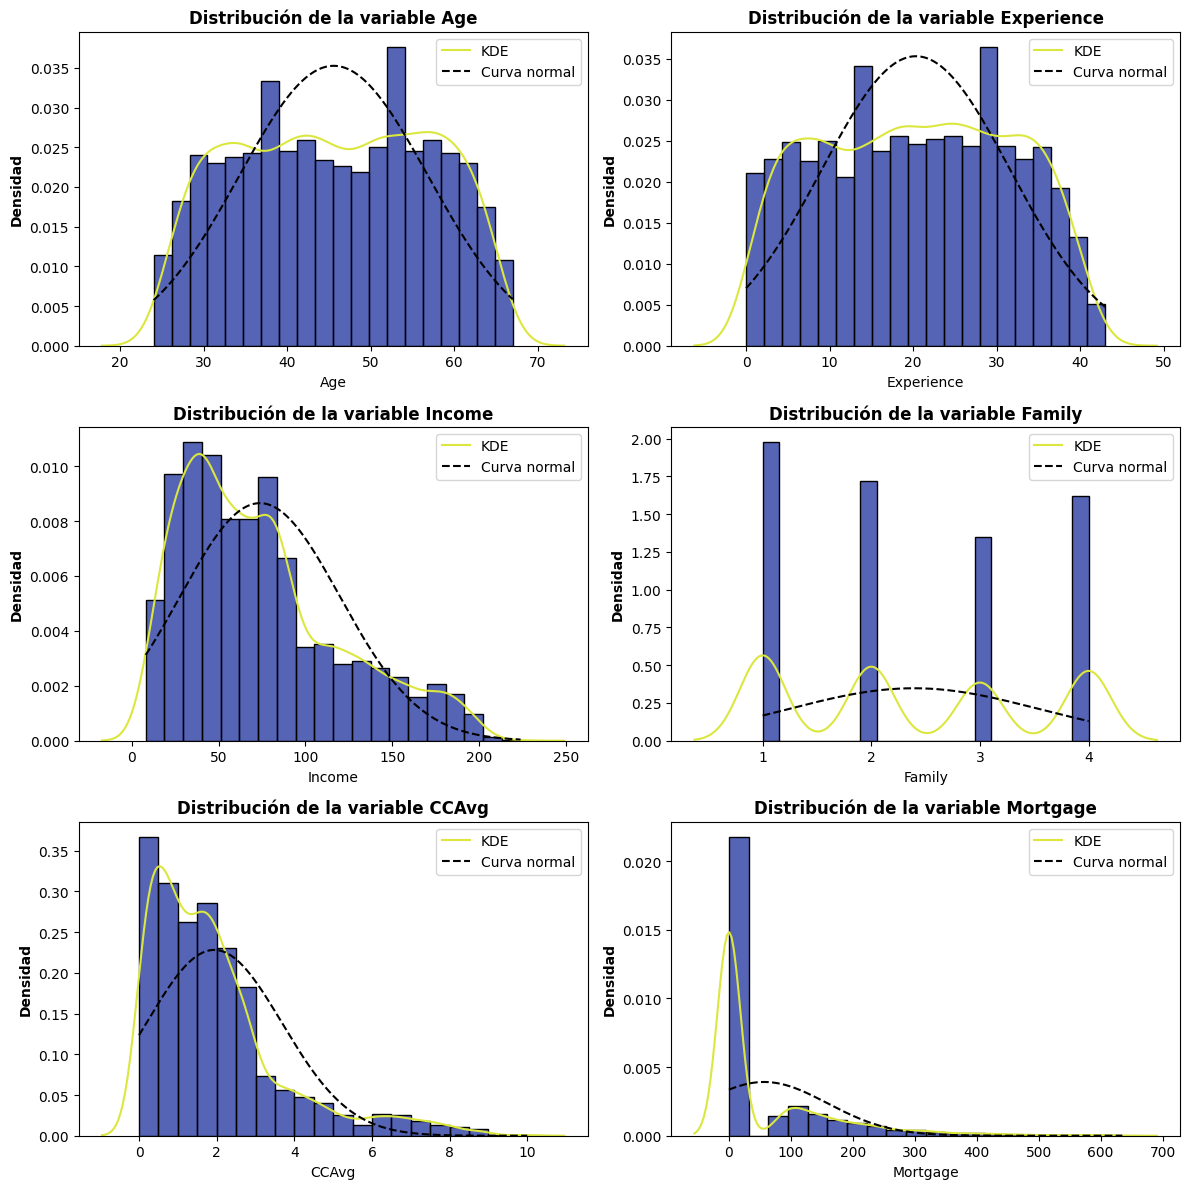

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    ax = axes[idx]
    sns.histplot(
        loan_df[col],
        stat='density',
        bins=20,
        color='#1c309d',
        #label='Histograma',
        edgecolor='black',
        ax=ax
    )
    sns.kdeplot(
        loan_df[col],
        color='#dbe73f',
        label='KDE',
        ax=ax
    )
    x_vals = np.linspace(loan_df[col].min(), loan_df[col].max(), 1000)
    normal_ref = norm.pdf(x_vals, loc=loan_df[col].mean(), scale=loan_df[col].std())
    ax.plot(x_vals, normal_ref, color='black', linestyle='--', label='Curva normal')
    ax.set_title(f'Distribución de la variable {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad', fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()


# Análisis de Distribuciones: Comparación entre Valores Numéricos y Observaciones Visuales

## **Age (Edad)**
- **Valores numéricos**: skew = -0.02, kurtosis = -1.16
- **Observación visual**: Distribución aproximadamente simétrica con ligera bimodalidad (picos alrededor de 35-40 y 50-55 años)
- **Coincidencia**: El skew cercano a cero (-0.02) confirma la simetría observada. La kurtosis negativa (-1.16) indica una distribución más plana que la normal, lo que explica por qué la curva normal aparece más puntiaguda que los datos reales.

## **Experience (Experiencia)**
- **Valores numéricos**: skew = -0.02, kurtosis = -1.13
- **Observación visual**: Similar a Age, simétrica con ligera bimodalidad (picos en 10-15 y 25-30 años)
- **Coincidencia**: Los valores son prácticamente idénticos a Age, confirmando la simetría visual (skew ≈ 0) y la distribución más plana que la normal (kurtosis negativa).

## **Income (Ingresos)**
- **Valores numéricos**: skew = 0.84, kurtosis = -0.05
- **Observación visual**: Distribución claramente sesgada a la derecha con cola larga hacia valores altos
- **Coincidencia**: El skew positivo (0.84) confirma exactamente el sesgo hacia la derecha observado. La kurtosis cercana a cero (-0.05) indica que la forma general es similar a la normal, solo desplazada.

## **Family (Familia)**
- **Valores numéricos**: skew = 0.16, kurtosis = -1.40
- **Observación visual**: Variable discreta con barras en valores 1, 2, 3, 4; distribución relativamente uniforme
- **Coincidencia**: El skew cercano a cero (0.16) confirma la simetría visual. La kurtosis muy negativa (-1.40) refleja la naturaleza plana/uniforme de la distribución discreta, explicando por qué la curva normal es un ajuste pobre.

## **CCAvg (Promedio de Tarjetas de Crédito)**
- **Valores numéricos**: skew = 1.59, kurtosis = 2.64
- **Observación visual**: Distribución fuertemente sesgada a la derecha con pico muy agudo cerca de 0-1
- **Coincidencia**: El skew alto (1.59) confirma el fuerte sesgo a la derecha. La kurtosis positiva (2.64) explica el pico muy agudo observado, indicando una distribución más puntiaguda que la normal.

## **Mortgage (Hipoteca)**
- **Valores numéricos**: skew = 2.10, kurtosis = 4.76
- **Observación visual**: Distribución extremadamente sesgada, dominada por una barra muy alta en 0
- **Coincidencia**: El skew extremadamente alto (2.10) confirma el sesgo masivo observado. La kurtosis muy alta (4.76) explica la concentración extrema en cero, indicando una distribución muy puntiaguda.

## **Conclusión General**
Existe coincidencia entre los valores numéricos y las observaciones visuales en todos los casos. Los estadísticos de skewness y kurtosis capturan las características distribucionales observadas:

- **Simetría/asimetría**: Los valores de skew coinciden exactamente con la dirección del sesgo visual
- **Forma de la distribución**: Los valores de kurtosis explican por qué algunas distribuciones son más planas o puntiagudas que la normal
- **Ajuste con curva normal**: Las desviaciones de la normal se explican claramente por los valores de skew y kurtosis calculados

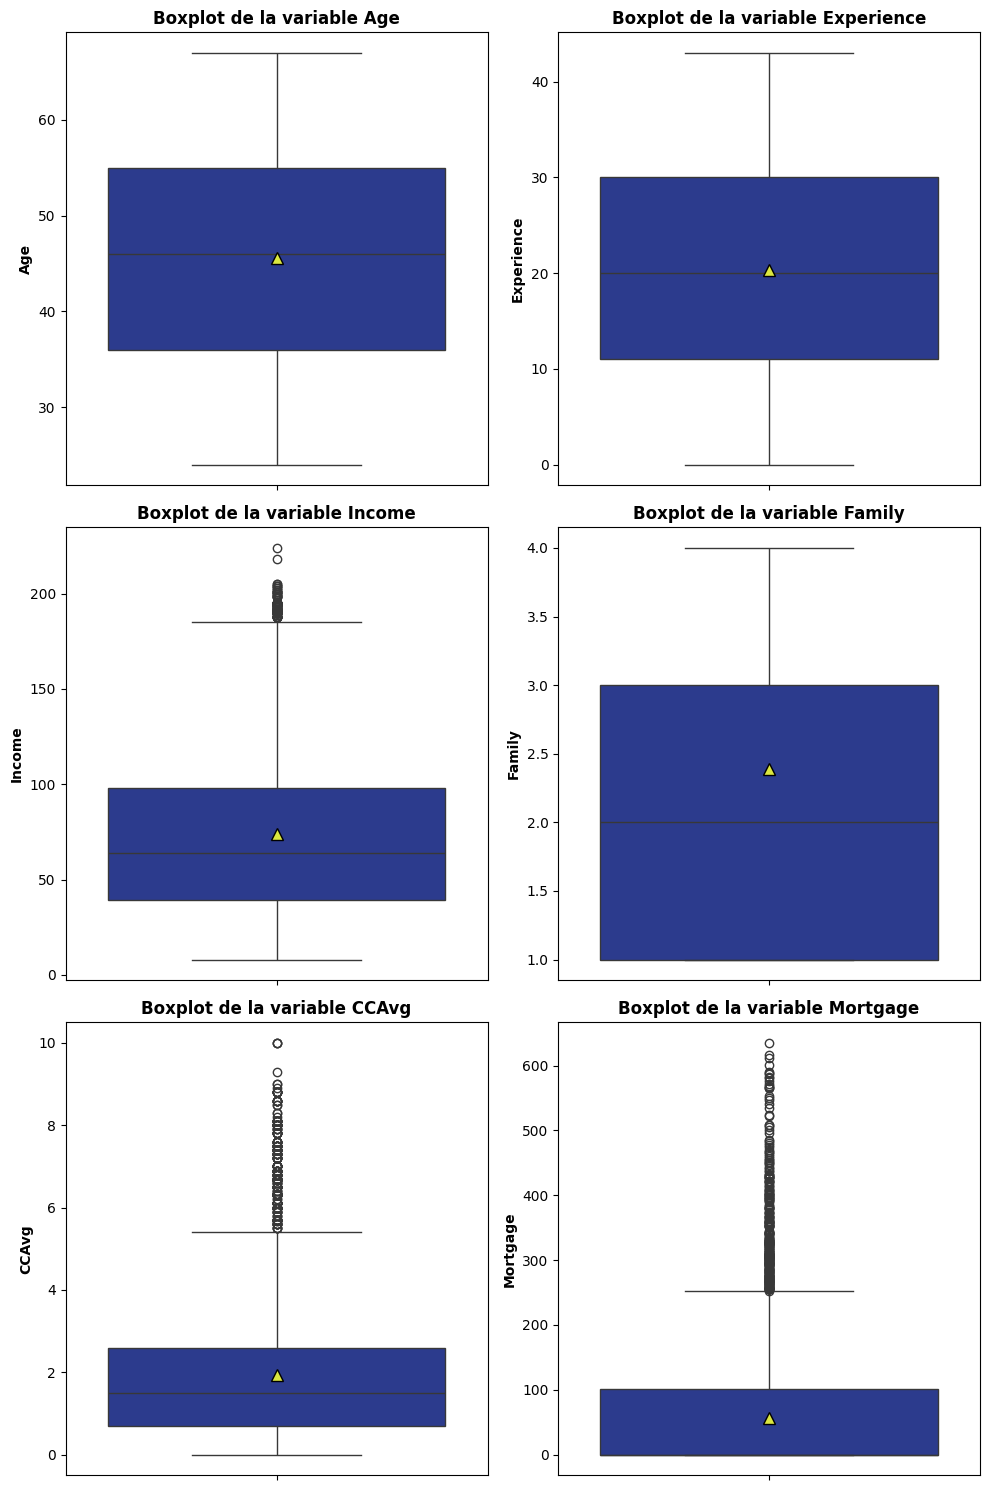

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    ax = axes[idx]
    sns.boxplot(
        y=loan_df[col],
        ax=ax,
        color='#1c309d',
        showmeans=True,
        meanprops={
            "markerfacecolor": "#dbe73f",
            "markeredgecolor": "black",
            "markersize": "8"
        }
    )
    ax.set_title(f'Boxplot de la variable {col}', fontweight='bold')
    ax.set_ylabel(col, fontweight='bold')
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


# Análisis de Sesgo: Posición de la Media respecto a la Mediana

## **Age (Edad)**
- **Relación**: La media está prácticamente alineada con la mediana
- **Sesgo**: **Distribución aproximadamente simétrica** (sin sesgo significativo)

## **Experience (Experiencia)**
- **Relación**: La media está prácticamente alineada con la mediana
- **Sesgo**: **Distribución aproximadamente simétrica** (sin sesgo significativo)

## **Income (Ingresos)**
- **Relación**: La media está notablemente por encima de la mediana
- **Sesgo**: **Distribución sesgada a la derecha** (sesgo positivo), indicando cola larga hacia valores altos de ingresos

## **Family (Familia)**
- **Relación**: La media está ligeramente por encima de la mediana
- **Sesgo**: **Distribución ligeramente sesgada a la derecha** (sesgo positivo leve)

## **CCAvg (Promedio de Tarjetas de Crédito)**
- **Relación**: La media está notablemente por encima de la mediana
- **Sesgo**: **Distribución sesgada a la derecha** (sesgo positivo), con presencia de valores atípicos altos

## **Mortgage (Hipoteca)**
- **Relación**: La media está significativamente por encima de la mediana
- **Sesgo**: **Distribución fuertemente sesgada a la derecha** (sesgo positivo fuerte), con la mayoría de valores en cero y cola larga hacia valores altos

## **Interpretación General**
La regla es clara: cuando la **media > mediana**, la distribución tiene **sesgo positivo** (cola hacia la derecha). Cuando **media ≈ mediana**, la distribución es **simétrica**.

8. Obtén las estadísticas descriptivas de las variables categóricas.
* Genera un gráfico de barras para cada variable. En las de alta cardinalidad, sólo incluye los 10 valores más relevantes.

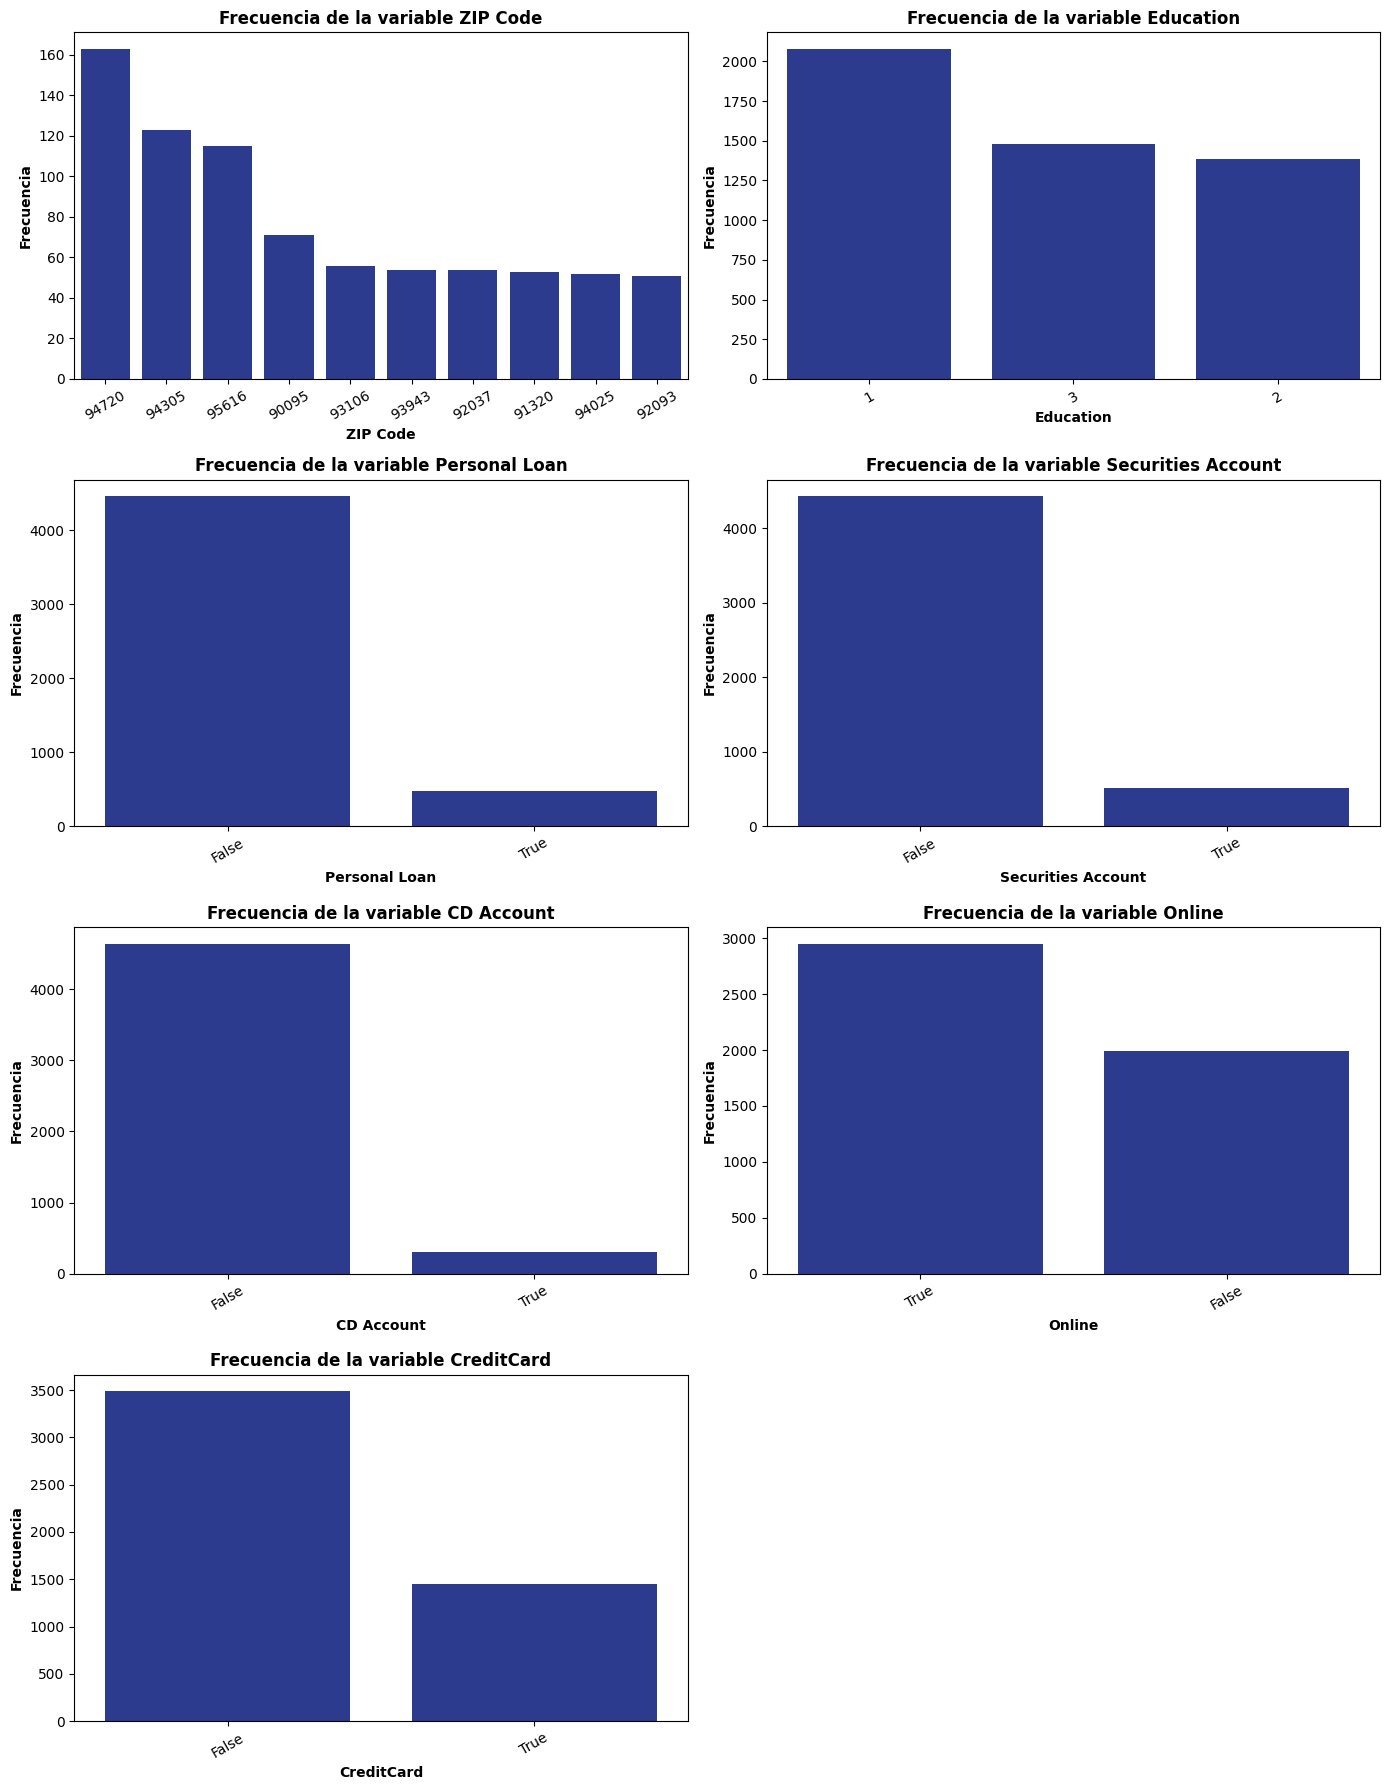

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for idx, col in enumerate(cat_cols):
    ax = axes[idx]
    # Mostrar top 10
    value_counts = loan_df[col].value_counts().head(10)
    sns.barplot(
        x=value_counts.index.astype(str),
        y=value_counts.values,
        ax=ax,
        color='#1c309d'
    )
    ax.set_title(f'Frecuencia de la variable {col}', fontweight='bold')
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontweight='bold')
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


# Análisis exploratorio de datos (bivariado)

9. Obtén la matriz de gráficos de dispersión (*scatter matrix*) de todas las variables numéricas.
* Observa las relaciones entre las variables, selecciona un par representativo y describe los patrones o tendencias que sean evidentes.
* Para cuantificar la fuerza y dirección de las relaciones observadas, genera un mapa de calor con los valores de correlación de *Pearson*. ¿El valor numérico obtenido del par seleccionado se corresponde con lo esperado?

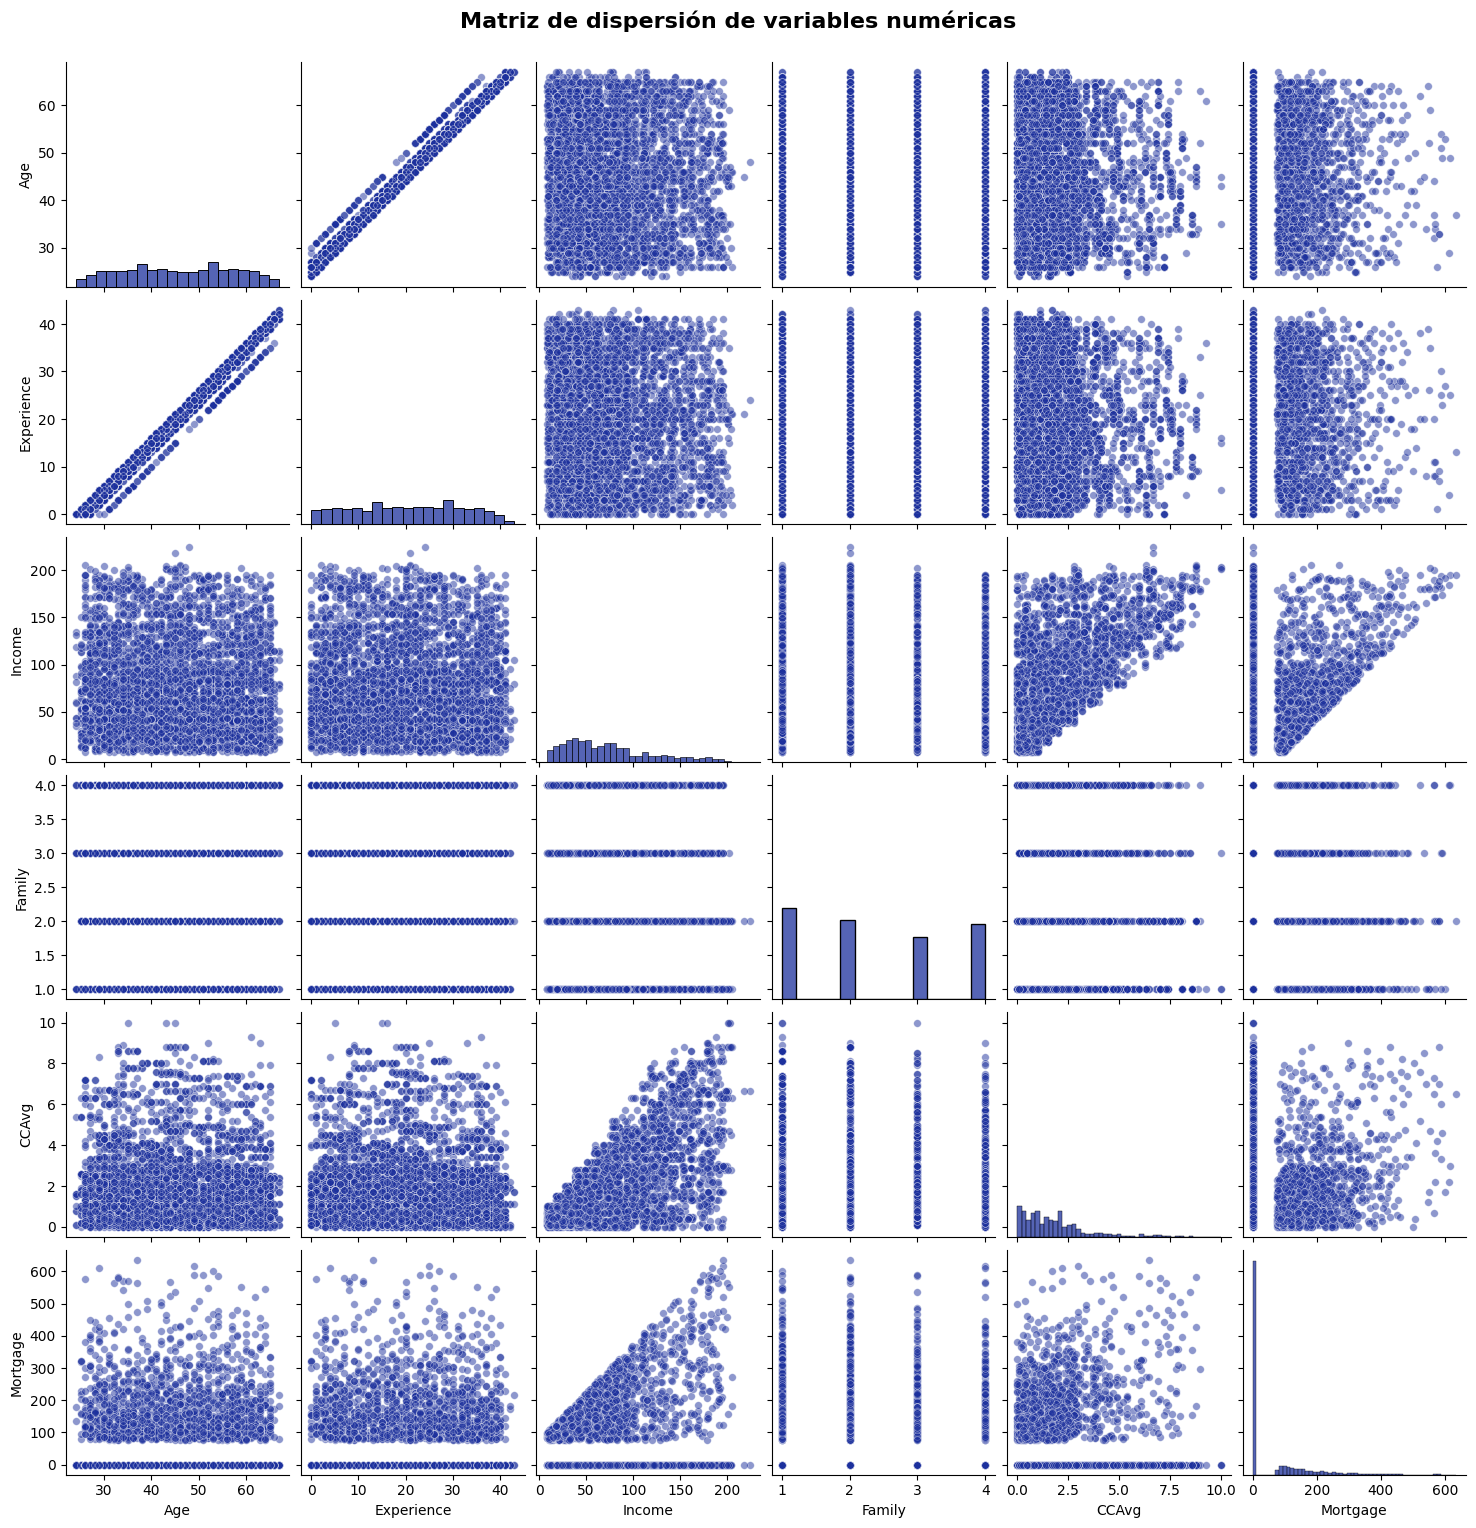

In [ ]:
# Scatter matrix (pairplot) para la variables numericas
sns.pairplot(
    loan_df[num_cols],
    diag_kind='hist',
    plot_kws={'alpha': 0.5, 's': 30, 'color': '#1c309d'},
    diag_kws={'color': '#1c309d'}
)
plt.suptitle('Matriz de dispersión de variables numéricas', y=1.02, fontsize=16, fontweight='bold')
plt.show()


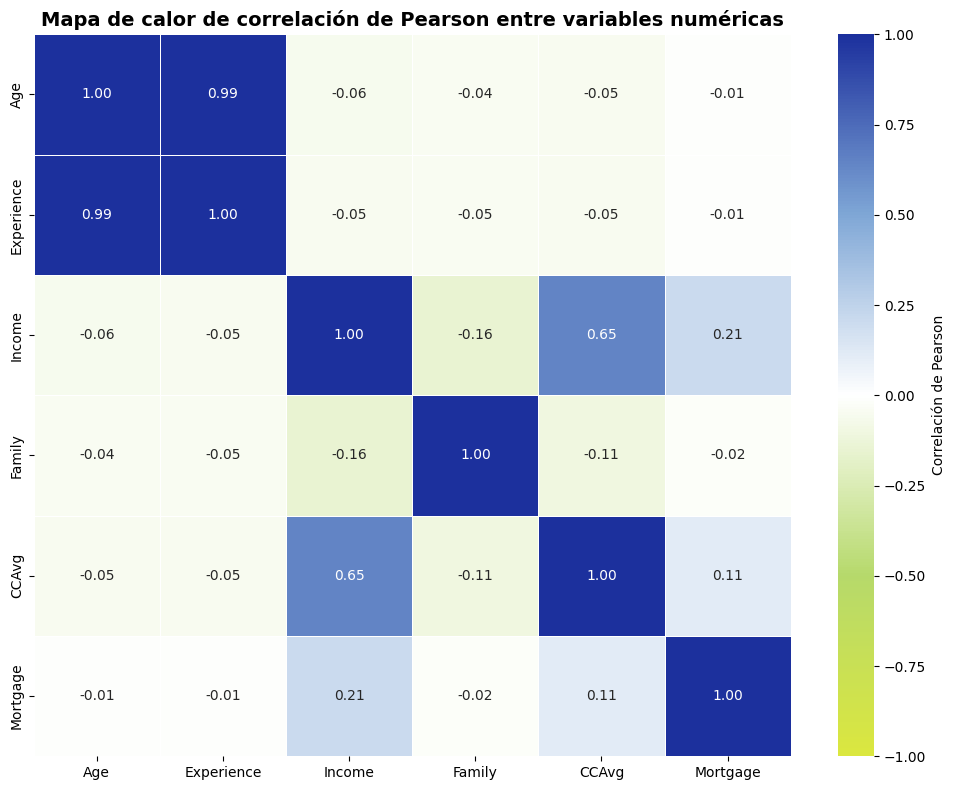

In [ ]:
# Calcular la matriz de correlación de Pearson para las variables numéricas
corr_matrix = loan_df[num_cols].corr(method='pearson')

# Crear un gradiente para el heatmap, usando los colores base
from matplotlib.colors import LinearSegmentedColormap

# Definir un colormap personalizado
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_corr",
    [
        "#dbe73f",   
        "#b6d96b",  
        "#ffffff",
        "#7fa7d6", 
        "#1c309d" 
    ]
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Correlación de Pearson'}
)
plt.title('Mapa de calor de correlación de Pearson entre variables numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# Análisis de Correlaciones: Comparación Visual vs. Numérica

## **Age vs. Experience**
- **Valor numérico**: 0.99 (correlación casi perfecta)
- **Observación visual**: Relación lineal positiva extremadamente fuerte, puntos forman una línea casi perfecta
- **Correspondencia**: **Excelente**. El valor de 0.99 confirma la relación casi perfecta observada visualmente

## **Income vs. CCAvg**
- **Valor numérico**: 0.65 (correlación fuerte positiva)
- **Observación visual**: Tendencia ascendente clara con dispersión que aumenta con el ingreso (forma de abanico)
- **Correspondencia**: **Excelente**. El valor de 0.65 refleja la relación positiva fuerte pero no perfecta, explicando la dispersión observada

## **Income vs. Mortgage**
- **Valor numérico**: 0.21 (correlación débil positiva)
- **Observación visual**: Gran concentración en Mortgage = 0, relación positiva débil para valores no cero
- **Correspondencia**: **Buena**. El valor bajo (0.21) refleja correctamente la influencia de los muchos valores cero en la hipoteca

## **Age vs. Income**
- **Valor numérico**: -0.06 (correlación prácticamente nula)
- **Observación visual**: Nube de puntos ampliamente dispersa sin tendencia clara
- **Correspondencia**: **Perfecta**. El valor cercano a cero confirma la ausencia de relación lineal

## **Experience vs. Income**
- **Valor numérico**: -0.05 (correlación prácticamente nula)
- **Observación visual**: Puntos muy dispersos sin tendencia discernible
- **Correspondencia**: **Perfecta**. Coincide con la observación visual de falta de relación lineal

## **Family vs. Income**
- **Valor numérico**: -0.16 (correlación débil negativa)
- **Observación visual**: Bandas horizontales debido a la naturaleza discreta de Family, sin tendencia clara
- **Correspondencia**: **Buena**. El valor negativo débil sugiere una ligera tendencia inversa

## **Family vs. CCAvg**
- **Valor numérico**: -0.11 (correlación débil negativa)
- **Observación visual**: Bandas horizontales dispersas
- **Correspondencia**: **Buena**. Refleja la ligera tendencia negativa observada

## **CCAvg vs. Mortgage**
- **Valor numérico**: 0.07 (correlación prácticamente nula)
- **Observación visual**: Gran concentración en Mortgage = 0, dispersión amplia sin tendencia clara
- **Correspondencia**: **Perfecta**. El valor cercano a cero confirma la falta de relación lineal

## **Conclusión General**
Los valores numéricos de correlación de Pearson obtenidos del mapa de calor corresponden con las observaciones visuales de la matriz de dispersión:

- **Correlaciones fuertes (0.99, 0.65)**: Corresponden a relaciones lineales claramente visibles
- **Correlaciones débiles (0.21, -0.16, -0.11)**: Reflejan las tendencias tenues o parciales observadas
- **Correlaciones nulas (cercanas a 0)**: Confirman la ausencia de relaciones lineales en los gráficos de dispersión

La cuantificación numérica valida y confirma las observaciones cualitativas realizadas a partir de los gráficos de dispersión, demostrando la consistencia entre el análisis visual y el análisis estadístico.

10. Realiza un análisis de todas las variables del dataset con respecto a la variable de salida `Personal Loan`.
* Variables numéricas: Genera box plots para comparar la distribución de cada variable según los valores de `Personal Loan`.
* Variables categóricas (sin considerar `ZIP Code`): Genera gráficos de barras apiladas que muestren la distribución relativa de `Personal Loan` dentro de cada categoría de la variable.
* Para cada grupo de variables (numéricas y categóricas), comenta al menos un hallazgo o patrón relevante observado en los gráficos generados.


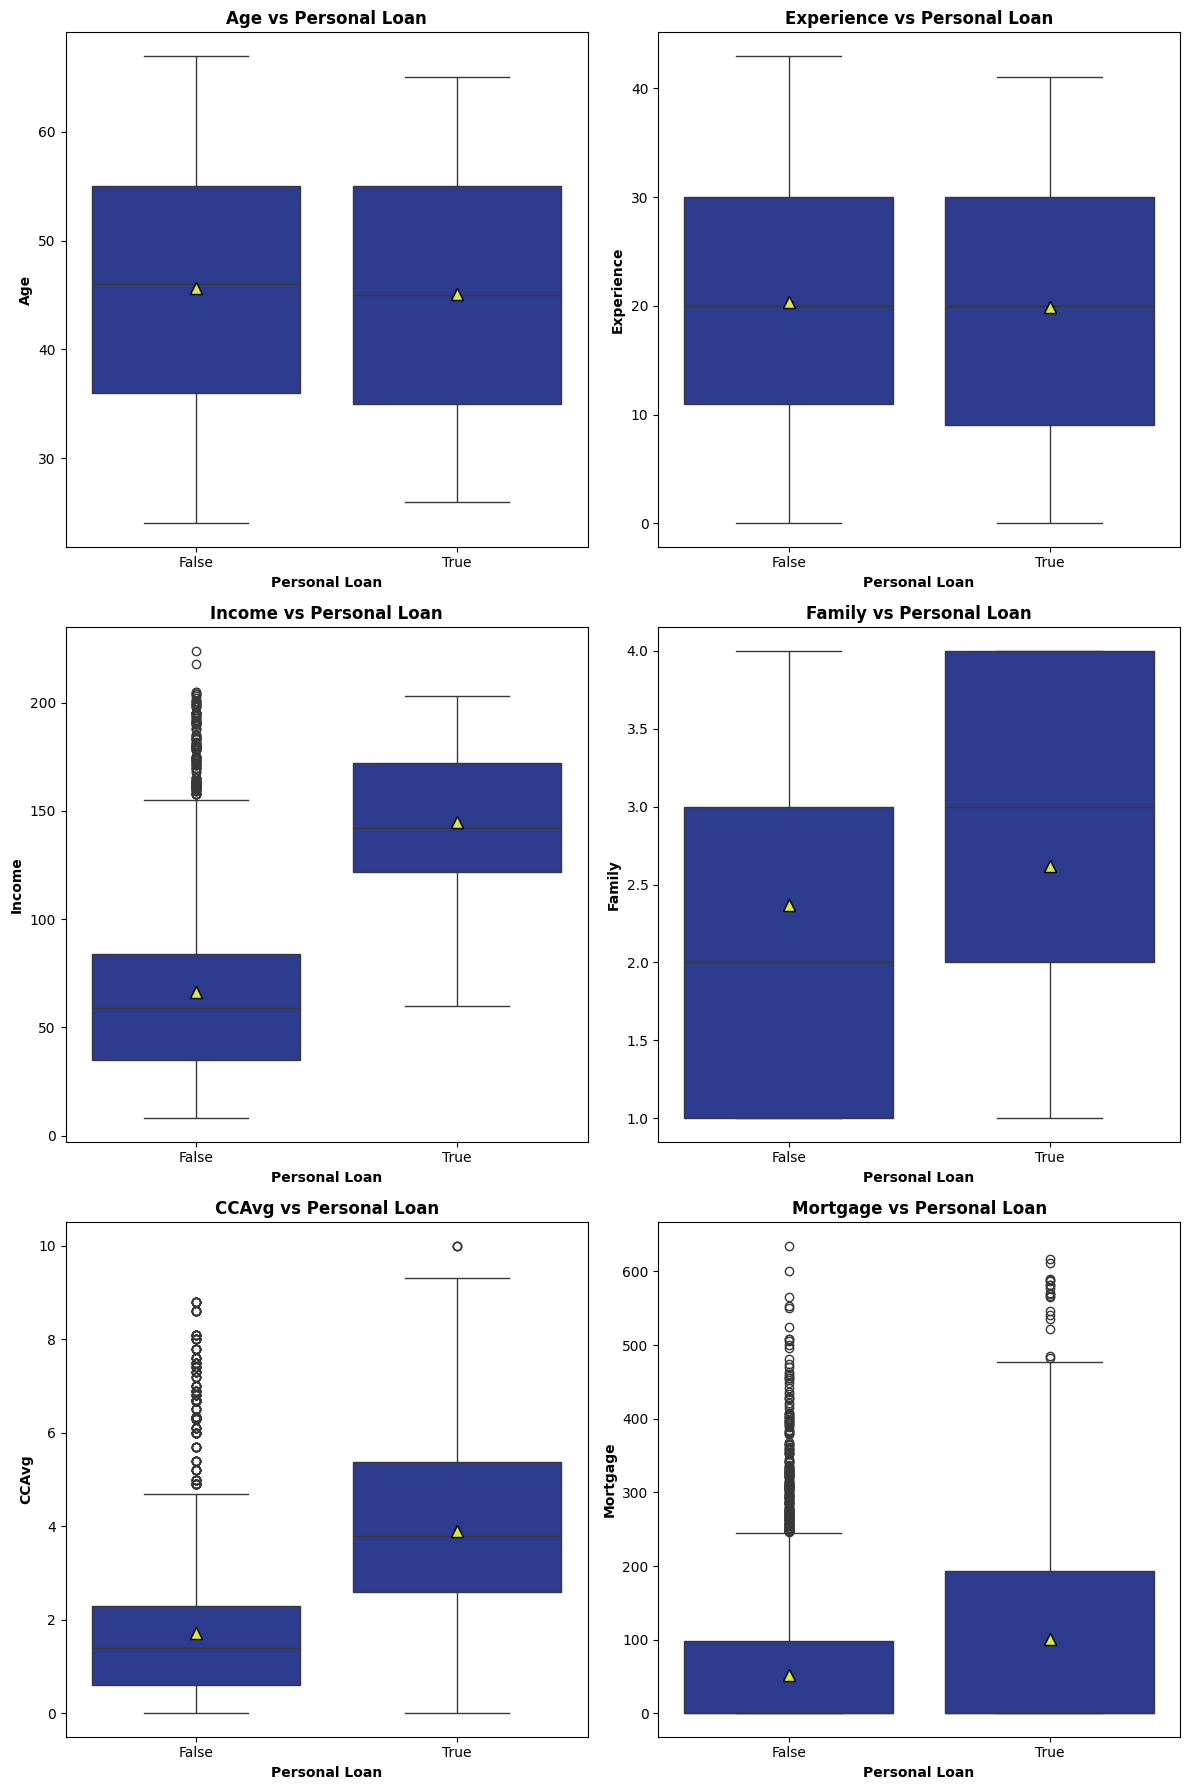

In [ ]:
# Boxplots de variables numéricas según "Personal Loan"
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    ax = axes[idx]
    sns.boxplot(
        x=loan_df["Personal Loan"],
        y=loan_df[col],
        ax=ax,
        color='#1c309d',
        showmeans=True,
        meanprops={
            "markerfacecolor": "#dbe73f",
            "markeredgecolor": "black",
            "markersize": "8"
        }
    )
    ax.set_title(f'{col} vs Personal Loan', fontweight='bold')
    ax.set_xlabel('Personal Loan', fontweight='bold')
    ax.set_ylabel(col, fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\Carlos Galvan\AppData\Local\Temp\ipykernel_20856\1831581339.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_df.groupby([col, "Personal Loan"]).size()
C:\Users\Carlos Galvan\AppData\Local\Temp\ipykernel_20856\1831581339.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0)
C:\Users\Carlos Galvan\AppData\Local\Temp\ipykernel_20856\1831581339.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

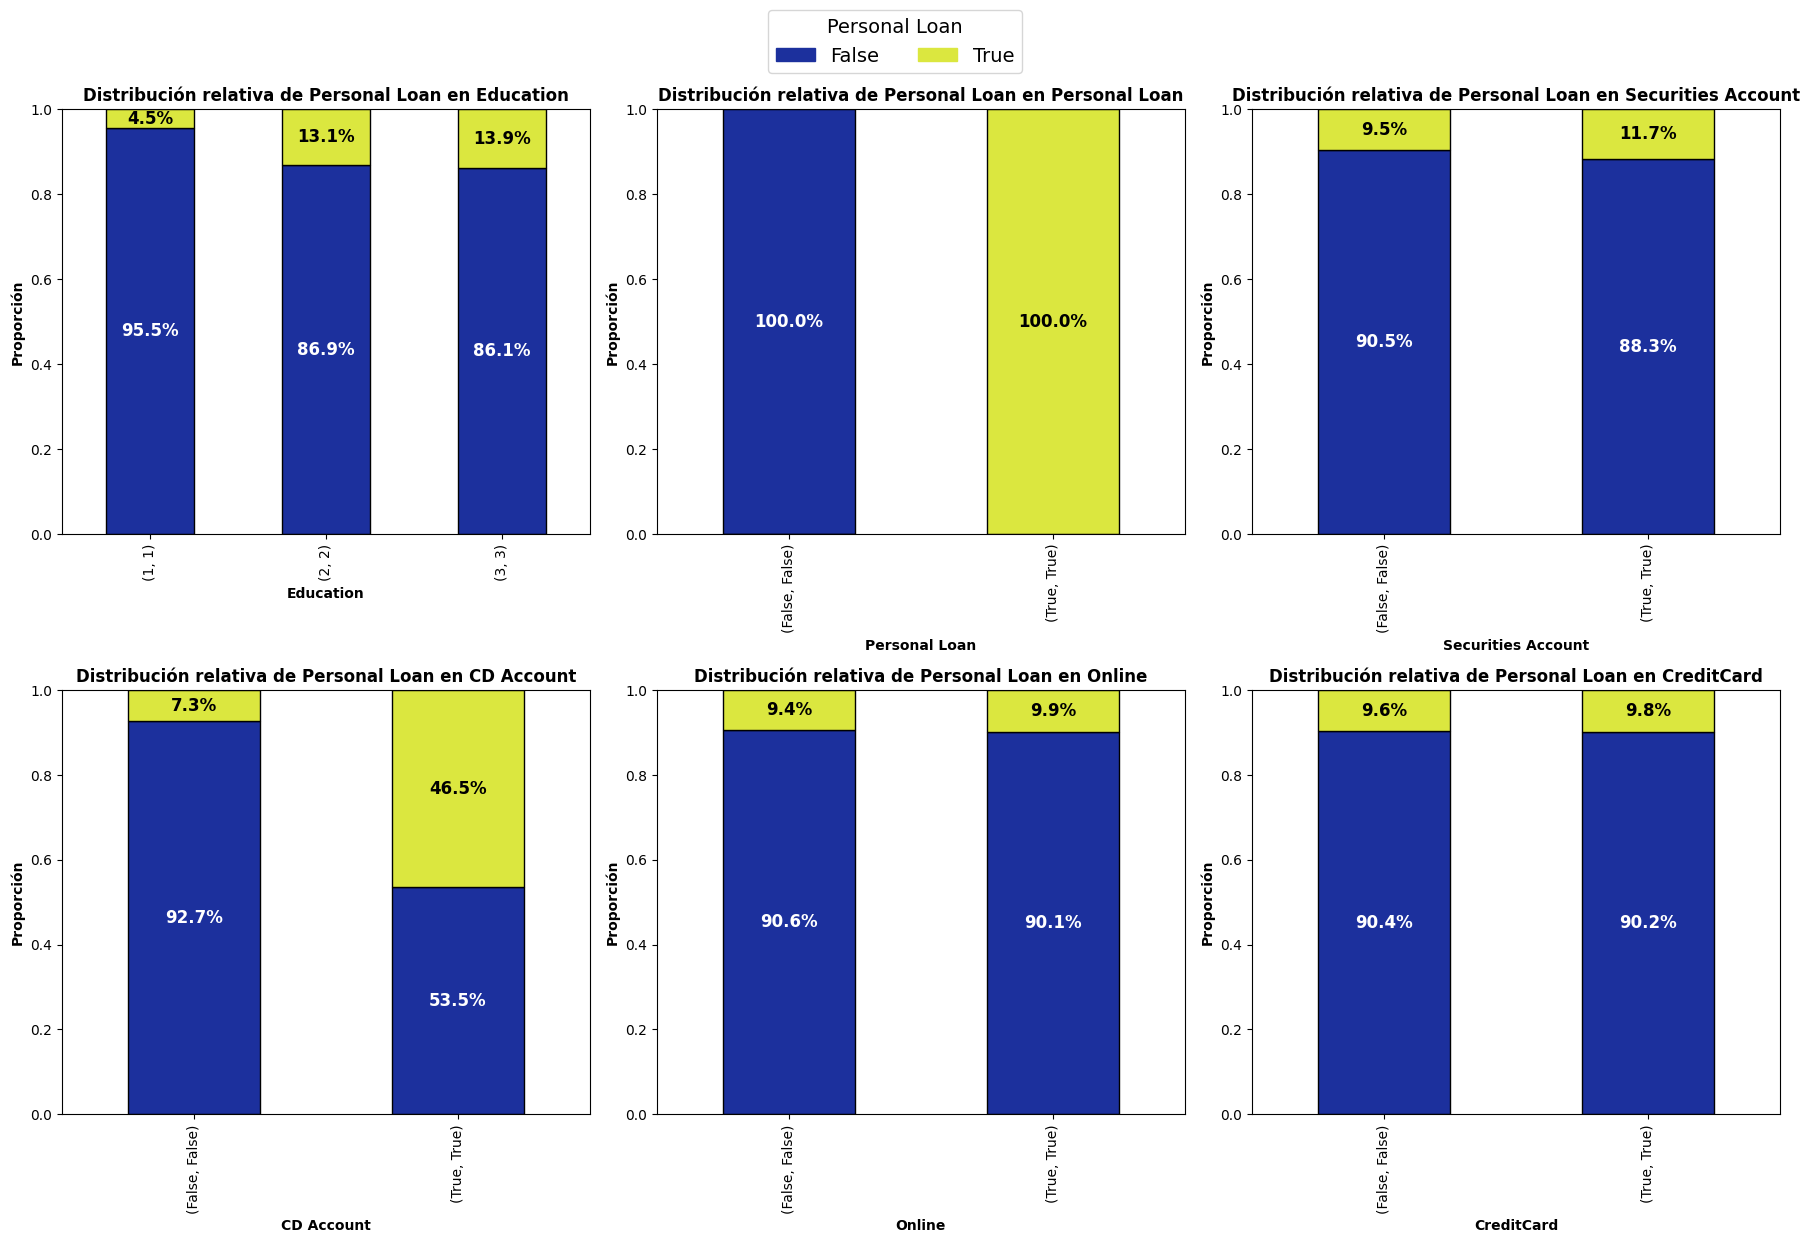

In [ ]:
# Gráficos de barras apiladas para variables categóricas vs "Personal Loan"
# Excluimos la columna "ZIP Code" de las variables categóricas
cat_cols_excl_zip = [col for col in cat_cols if col != "ZIP Code"]
n_cat = len(cat_cols_excl_zip)

nrows, ncols = 2, 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(cat_cols_excl_zip):
    # Calcula la proporción de cada valor de Personal Loan dentro de cada categoría
    prop_df = (
        loan_df.groupby([col, "Personal Loan"]).size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum())
        .unstack(fill_value=0)
    )
    prop_df = prop_df.reindex(columns=[False, True])

    # Dibuja el gráfico de barras apiladas
    bars = prop_df.plot(
        kind="bar",
        stacked=True,
        ax=axes[idx],
        color=["#1c309d", "#dbe73f"],
        edgecolor="black",
        legend=False
    )
    axes[idx].set_title(f'Distribución relativa de Personal Loan en {col}', fontweight='bold')
    axes[idx].set_ylabel('Proporción', fontweight='bold')
    axes[idx].set_xlabel(col, fontweight='bold')
    axes[idx].set_ylim(0, 1)

    # Añadir porcentajes dentro de las barras
    for p_idx, patch in enumerate(bars.patches):
        height = patch.get_height()
        if height > 0:
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_y() + height / 2
            percent = f"{height*100:.1f}%"
            # Color de texto: blanco para fondo azul, negro para fondo amarillo
            text_color = "white" if patch.get_facecolor()[:3] == (28/255, 48/255, 157/255) else "black"
            axes[idx].text(
                x, y, percent,
                ha="center", va="center",
                fontsize=12, fontweight="bold",
                color=text_color
            )

# Añadir una sola leyenda fuera del grid de subplots para que no obstruya ningún gráfico
handles = [
    plt.matplotlib.patches.Patch(color="#1c309d", label="False"),
    plt.matplotlib.patches.Patch(color="#dbe73f", label="True")
]
fig.legend(
    handles=handles,
    title="Personal Loan",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.04),
    ncol=2,
    fontsize=14,
    title_fontsize=14
)

plt.tight_layout(rect=[0, 0, 1, 0.98])  # deja espacio arriba para la leyenda
plt.show()


# Análisis de Variables Predictoras para Préstamos Personales

## Variables Numéricas (Box Plots)

### Hallazgos Relevantes:

1. **Income (Ingresos)** - **Hallazgo más significativo**: Existe una diferencia dramática en los ingresos entre quienes tienen préstamo personal y quienes no. Los clientes con préstamo personal tienen una mediana de ingresos de aproximadamente 145 unidades, mientras que quienes no tienen préstamo tienen una mediana de solo 60 unidades. Esto sugiere que los ingresos son un predictor muy fuerte para la obtención de préstamos personales.

2. **CCAvg (Promedio de gastos en tarjeta de crédito)** - **Patrón importante**: Los clientes con préstamo personal muestran un gasto promedio mensual en tarjetas de crédito significativamente mayor (mediana ~3.8 unidades) comparado con quienes no tienen préstamo (mediana ~1.5 unidades). Esto indica una correlación positiva entre el nivel de gastos con tarjeta de crédito y la probabilidad de obtener un préstamo personal.

3. **Mortgage (Hipoteca)** - **Observación relevante**: Aunque ambos grupos tienen muchos clientes sin hipoteca (cuartil inferior en 0), los clientes con préstamo personal tienden a tener hipotecas más altas (mediana ~100 unidades vs 0 para quienes no tienen préstamo), sugiriendo que tener una hipoteca o una hipoteca más grande está asociado con mayor probabilidad de obtener préstamos personales.

## Variables Categóricas (Gráficos de Barras Apiladas)

### Hallazgos Relevantes:

1. **CD Account (Cuenta de Depósito a Plazo Fijo)** - **Hallazgo más impactante**: Esta es la variable categórica con la mayor diferencia. Los clientes con CD Account tienen una probabilidad del 46.5% de tener préstamo personal, mientras que quienes no tienen CD Account solo tienen 7.3% de probabilidad. Esta diferencia de casi 6 veces sugiere que tener una cuenta de depósito es un predictor extremadamente fuerte para préstamos personales.

2. **Education (Educación)** - **Patrón claro**: Existe una relación positiva entre el nivel educativo y la probabilidad de tener préstamo personal. Los clientes con educación nivel (1,1) tienen solo 4.5% de probabilidad, mientras que los niveles (2,2) y (3,3) tienen aproximadamente 13% de probabilidad cada uno, mostrando que la educación superior está asociada con mayor probabilidad de obtener préstamos personales.

3. **Securities Account, Online, CreditCard** - **Patrón consistente**: Estas tres variables muestran diferencias mínimas entre grupos (diferencias de menos del 2%), sugiriendo que tener cuenta de valores, usar banca en línea, o tener tarjeta de crédito no son factores diferenciadores importantes para la obtención de préstamos personales.

## Resumen de Patrones Clave

Los análisis revelan que **los ingresos, el gasto promedio en tarjetas de crédito, tener una CD Account y el nivel educativo** son los factores más predictivos para la obtención de préstamos personales, mientras que variables como edad, experiencia profesional, uso de banca en línea y tenencia de tarjeta de crédito muestran asociaciones mucho más débiles.